# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )
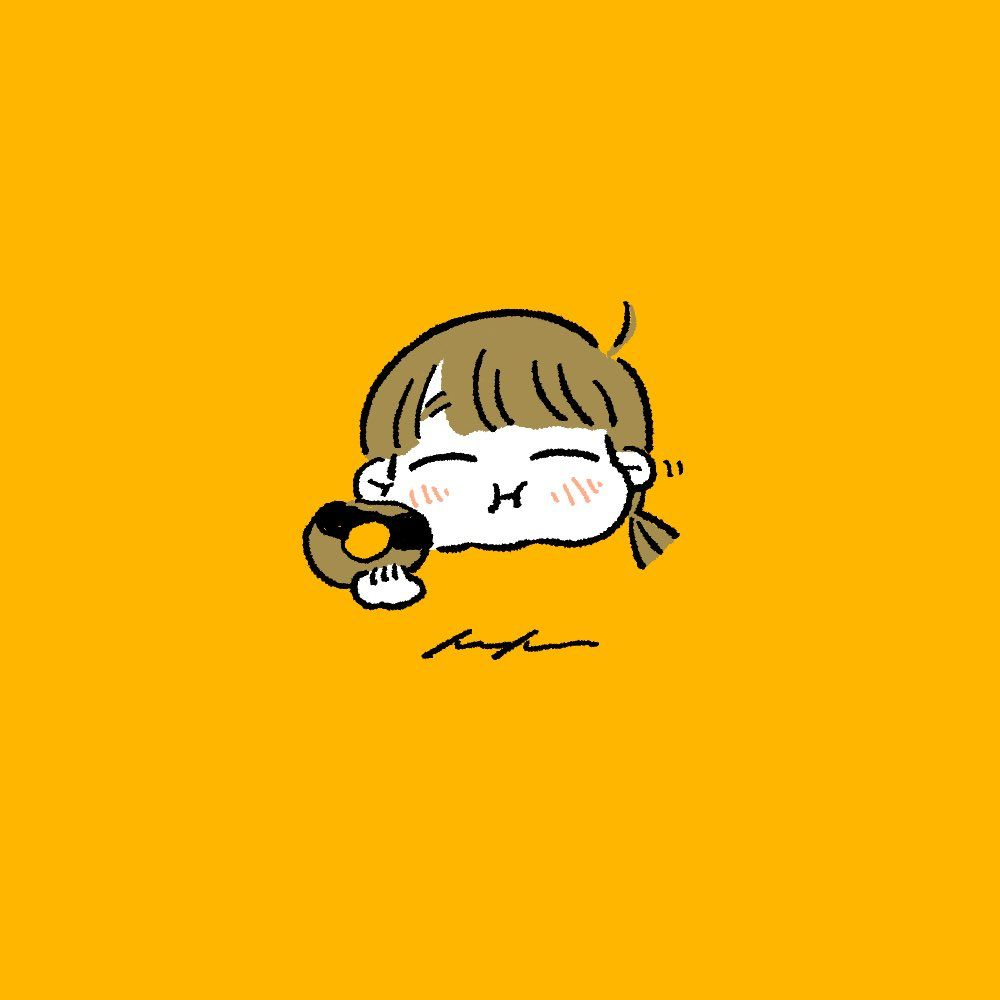

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('tbody')
print(table.prettify())

<tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">
    September 1, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">
    2023-9-1
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,258
    </span>
   </span>
   <span class="n">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,258
    </span>
   </span>
  </td>
 </tr>
 <tr class="odd">
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
    August 31, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
    2023-8-31
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class

> We have discovered the keyword from the object `table`. Where these keywords are found in the `tbody` tag of the data we have. And we have also succeeded in getting the data.

Finding row length.

In [6]:
table.find_all('tr')[:7]

[<tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">September 1, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">2023-9-1</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowra

> Takes `tr` tags where the `tr` tag is part of the `tbody` tag. Then we shorten it or only take 7 data. So as not to load a lot of data displayed.

> We will now look at another part of the `tbody` tag and a part of the `tr` tag element.

In [7]:
table.find_all('tr')[1].text

'\n\nAugust 31, 2023\n2023-8-31\n\n\n$1 = Rp15,225\n$1 = Rp15,225\n\n'

> Next, we will try to see what elements are contained in the `tr` tag.

In [8]:
table.find_all('a', attrs={'class':'w'})[0].text

'September 1, 2023'

> By looking at the results of the code above we have found. The initial data results are obtained from our data in the form of month, date and year. Namely `August 31, 2023`.

In [9]:
table.find_all('span', attrs={'class':"w"})[0].text

'$1 = Rp15,258'

> And we also find data on the value of the dollar against the rupiah. Where `1$ = IDR 15,225`.

**Extracting The Information**

> Next, we will extract the data information that we already have.

> Namun sebelumnya kita akan melihat dulu berapa banyak data atau rentang daBut first we will first see how much data or data range we have. Namely by using the `len()` function.

In [10]:
row_table = table.find_all('tr')
row_length = len(row_table)
row_length

133

Do the scrapping process here (please change this markdown with your explanation)

> In this section we will perform `Looping`. Where `Looping` is repeating a command/instruction made in the script according to a predetermined number of times. And at the same time we will sort our data according to date order using the `temp[]` function.

In [11]:
temp = [] #initiating a tuple

for i in range(0, 129):
    
    #get period time
    period_time = table.find_all('a', attrs={'class':'w'})[i].text
    
    #period currency
    period_currency = table.find_all('span', attrs={'class':'w'})[i].text
    
    temp.append((period_time, period_currency))
temp

[('September 1, 2023', '$1 = Rp15,258'),
 ('August 31, 2023', '$1 = Rp15,225'),
 ('August 30, 2023', '$1 = Rp15,223'),
 ('August 29, 2023', '$1 = Rp15,202'),
 ('August 28, 2023', '$1 = Rp15,248'),
 ('August 25, 2023', '$1 = Rp15,298'),
 ('August 24, 2023', '$1 = Rp15,246'),
 ('August 23, 2023', '$1 = Rp15,301'),
 ('August 22, 2023', '$1 = Rp15,324'),
 ('August 21, 2023', '$1 = Rp15,325'),
 ('August 18, 2023', '$1 = Rp15,321'),
 ('August 17, 2023', '$1 = Rp15,343'),
 ('August 16, 2023', '$1 = Rp15,369'),
 ('August 15, 2023', '$1 = Rp15,318'),
 ('August 14, 2023', '$1 = Rp15,330'),
 ('August 11, 2023', '$1 = Rp15,324'),
 ('August 10, 2023', '$1 = Rp15,263'),
 ('August 9, 2023', '$1 = Rp15,214'),
 ('August 8, 2023', '$1 = Rp15,212'),
 ('August 7, 2023', '$1 = Rp15,225'),
 ('August 4, 2023', '$1 = Rp15,153'),
 ('August 3, 2023', '$1 = Rp15,148'),
 ('August 2, 2023', '$1 = Rp15,227'),
 ('August 1, 2023', '$1 = Rp15,121'),
 ('July 31, 2023', '$1 = Rp15,099'),
 ('July 28, 2023', '$1 = Rp15,10

In [12]:
temp = temp[::-1]
temp[:10]

[('March 7, 2023', '$1 = Rp15,429'),
 ('March 8, 2023', '$1 = Rp15,449'),
 ('March 9, 2023', '$1 = Rp15,495'),
 ('March 10, 2023', '$1 = Rp15,503'),
 ('March 13, 2023', '$1 = Rp15,416'),
 ('March 14, 2023', '$1 = Rp15,380'),
 ('March 15, 2023', '$1 = Rp15,459'),
 ('March 16, 2023', '$1 = Rp15,429'),
 ('March 17, 2023', '$1 = Rp15,375'),
 ('March 20, 2023', '$1 = Rp15,343')]

> From the results of the loop that we have done, we get the results or find out the data we have starting from August 31, 2023' with the value '$1 = Rp. 15,225.

And the last data we have is March 6, 2023' with the value '$1 = Rp. 15,354.

## Creating data frame & Data wrangling

> In the next stage we will process and analyze the data we already have so that later it is hoped that the data can be read more easily. Then we can make it a data frame.

Put the array into dataframe

In [13]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period_time','period_currency'))
df.head()

,period_time,period_currency
0,"March 7, 2023","$1 = Rp15,429"
1,"March 8, 2023","$1 = Rp15,449"
2,"March 9, 2023","$1 = Rp15,495"
3,"March 10, 2023","$1 = Rp15,503"
4,"March 13, 2023","$1 = Rp15,416"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [14]:
df.dtypes

period_time        object
period_currency    object
dtype: object

> From these results we get the fact that our data `period_time` and `period_currency` are still in the `object` data type. And the `period_currency` form of the data still cannot be clearly categorized.

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

> In this section the data we have, namely:
1.  From the `period_currency` table, remove `$1 = Rp` and `,`. By using the `.replace()` function.

In [15]:
period_currency1 = period_currency.replace('$1 = Rp', '')
period_currency1

'15,429'

In [16]:
df['period_currency'] = df['period_currency'].str.replace('$1 = Rp', '')
df['period_currency'] = df['period_currency'].str.replace(',', '')

> 2. Then we change our data type `period_time` from `object` to data type `datetime64[ns]`. Meanwhile, `period_currency` from `object` becomes `float64` data type.

In [17]:
df['period_time'] = df['period_time'].astype('datetime64[ns]')
df['period_currency'] = df['period_currency'].astype('float64')

In [18]:
df

,period_time,period_currency
0,2023-03-07,15429.0
1,2023-03-08,15449.0
2,2023-03-09,15495.0
3,2023-03-10,15503.0
4,2023-03-13,15416.0
...,...,...
124,2023-08-28,15248.0
125,2023-08-29,15202.0
126,2023-08-30,15223.0
127,2023-08-31,15225.0


In [19]:
df.dtypes

period_time        datetime64[ns]
period_currency           float64
dtype: object

In [19]:
df = df.set_index('period_time')

> We've finished wrangling the data and making it into a data frame. The next process is that we will make a `plot` from the data that we have processed.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='period_time'>

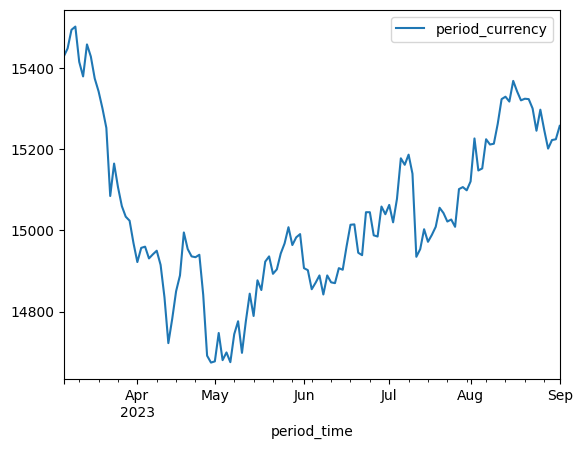

In [20]:
df.plot()

**Summary**
> From the results of the visualization that we have made, we can conclude:
1. The Indonesian Rupiah was never worth more than the US Dollar in the past 180 days.
2. The highest US Dollar to Indonesian Rupiah rate was on March 10, 2023 when 1 USD was worth 15,503 IDR.
3. The lowest US Dollar to Indonesian Rupiah rate was on April 28, 2023 when 1 USD was worth 14,674 IDR.
4. The average Indonesian Rupiah to US Dollar exchange rate for the last six months was 1 IDR = 0.00006648 USD.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.